In [4]:
#Kümeleme (Clustering)
"""
1- Centroid Based Clustering: K-means
2- Hierarchical Clustering: Agglomerative / Divisive
3- Density Models : DBSCAN, OPTICS
"""
#Sahte Haber Tespiti, Spam Filtreleme, Satış-Pazarlama, Ağ Trafiğini Kümeleme, Şüpheli Aktivite İzleme
#Deprem çalışmaları

'\n1- Centroid Based Clustering: K-means\n2- Hierarchical Clustering: Agglomerative / Divisive\n3- Density Models : DBSCAN, OPTICS\n'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
X = dataset.iloc[:, 3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


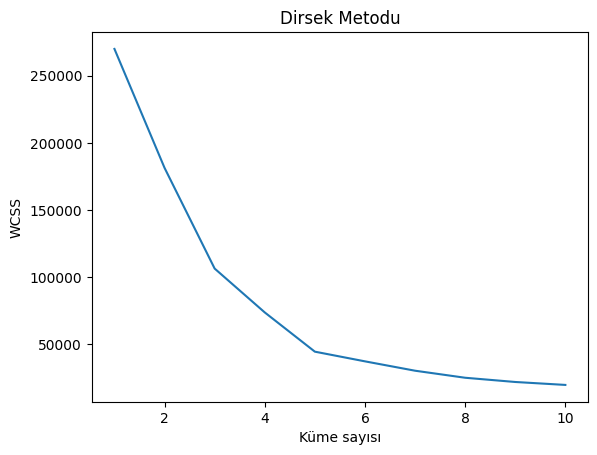

In [8]:
#Dirsek (Elbow) metodu
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Dirsek Metodu')
plt.xlabel('Küme sayısı')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [10]:
test = kmeans.predict([[15, #Annual Income (k$)
                        39, #Spending Score (1-100)
                       ]])

print("Bu nokta", test[0], "numaralı kümeye aittir")

Bu nokta 2 numaralı kümeye aittir


c:\Users\necme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [11]:
X[y_kmeans==0].head()

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42


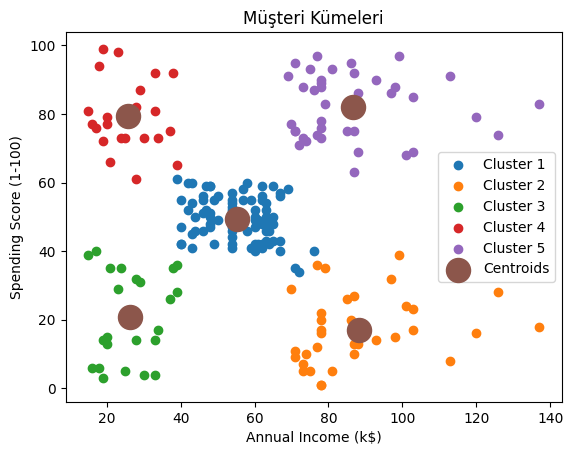

In [12]:
plt.scatter(X[y_kmeans==0]['Annual Income (k$)'], X[y_kmeans==0]['Spending Score (1-100)'], label = 'Cluster 1')
plt.scatter(X[y_kmeans==1]['Annual Income (k$)'], X[y_kmeans==1]['Spending Score (1-100)'], label = 'Cluster 2')
plt.scatter(X[y_kmeans==2]['Annual Income (k$)'], X[y_kmeans==2]['Spending Score (1-100)'], label = 'Cluster 3')
plt.scatter(X[y_kmeans==3]['Annual Income (k$)'], X[y_kmeans==3]['Spending Score (1-100)'], label = 'Cluster 4')
plt.scatter(X[y_kmeans==4]['Annual Income (k$)'], X[y_kmeans==4]['Spending Score (1-100)'], label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, label = 'Centroids')
plt.title('Müşteri Kümeleri')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
#Örnek-2
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

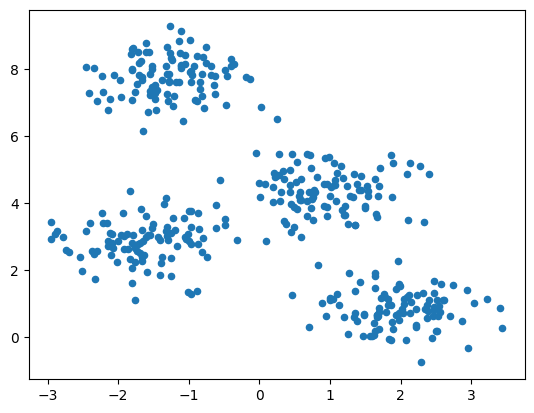

In [14]:
plt.scatter(X[:, 0], X[:, 1], s = 20)
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

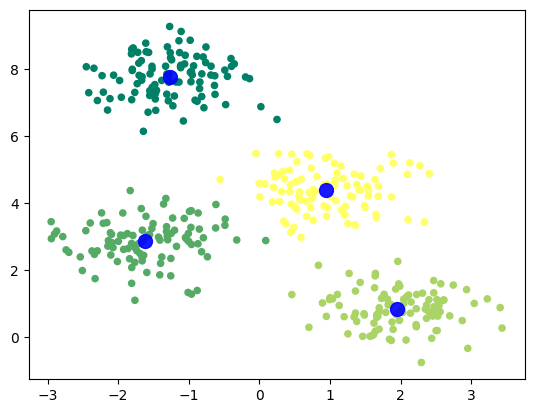

In [16]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9)
plt.show()

In [17]:
#Örnek-3
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [18]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

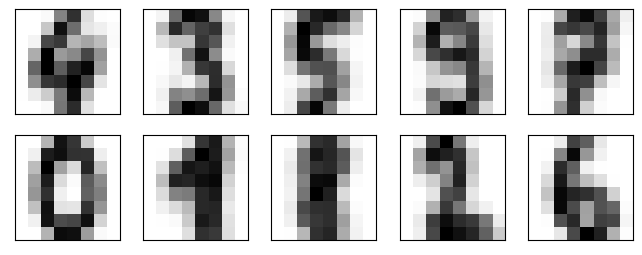

In [19]:
fig, ax = plt.subplots(2, 5, figsize = (8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

In [20]:
#Hierarchical Clustering
#Agglomerative Clustering 

In [22]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [23]:
customer_data.shape

(200, 5)

In [24]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
data = customer_data.iloc[:, 3:5].values

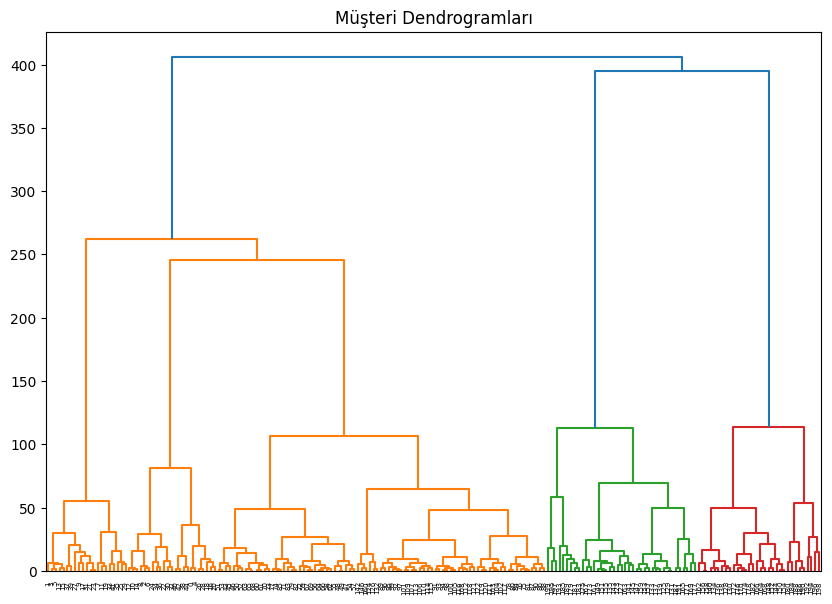

In [26]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10,7))
plt.title("Müşteri Dendrogramları")
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

In [27]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

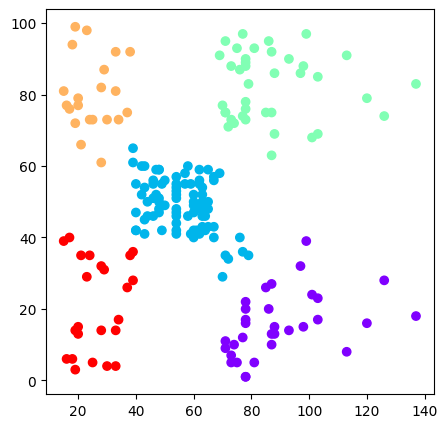

In [28]:
plt.figure(figsize = (5,5))
plt.scatter(data[:, 0], data[:, 1], c = cluster.labels_, cmap = 'rainbow')

In [30]:
#Örnek-2
headernames = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('pima-indians-diabetes.csv', names = headernames)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


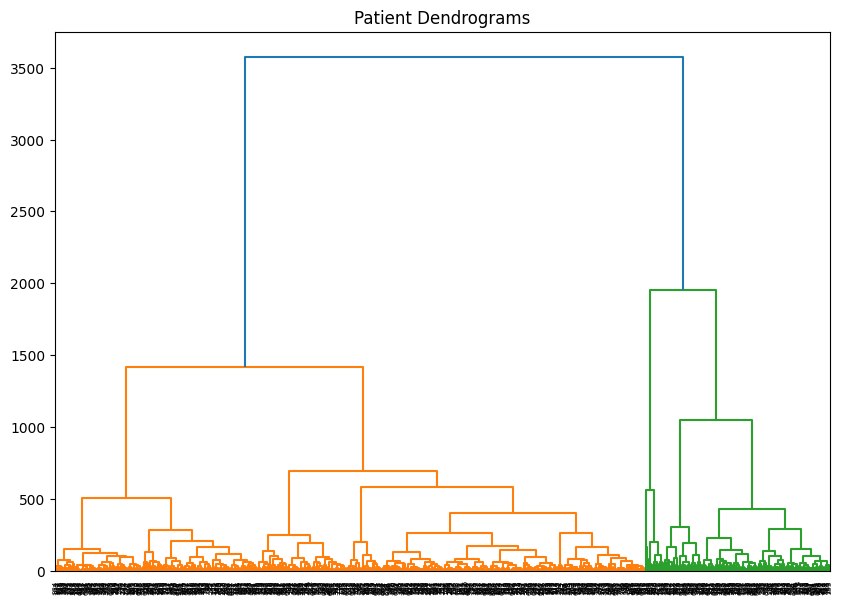

In [31]:
patient_data = data.iloc[:, 3:5].values
plt.figure(figsize=(10,7))
plt.title("Patient Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

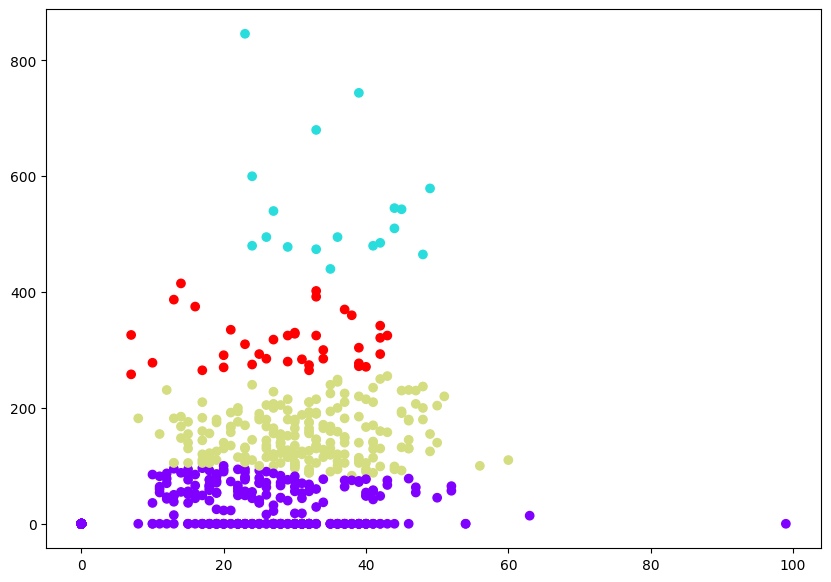

In [32]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(patient_data)
plt.figure(figsize = (10, 7))
plt.scatter(patient_data[:, 0], patient_data[:, 1], c = cluster.labels_, cmap = 'rainbow')

In [33]:
#Yoğunluk Modelleri (DBSCAN)

In [34]:
#Density Based Spatial Clustering of Applications with Noise 

In [35]:
#Epsilon : eps, komşu noktalar arası mesafe

In [36]:
#min_points : kullanıcı tarafından belirlenen nokta sayısı

In [37]:
#core_points : 

In [38]:
#border_points : 

In [40]:
dataset = pd.read_csv('dbscan.csv')
df = dataset
df.head()

,0,1
0,68.126832,161.675200
1,44.914873,75.058858
2,106.193470,142.420850
3,162.241870,120.278870
4,161.206290,119.607030


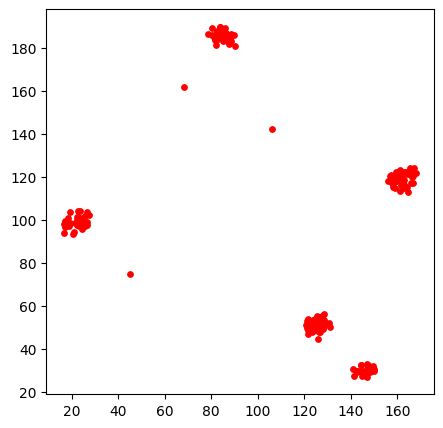

In [41]:
plt.figure(figsize = (5,5))
plt.scatter(df['0'], df['1'], s = 15, color = 'red')
plt.show()

In [42]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(df[['0', '1']])

DBSCAN()

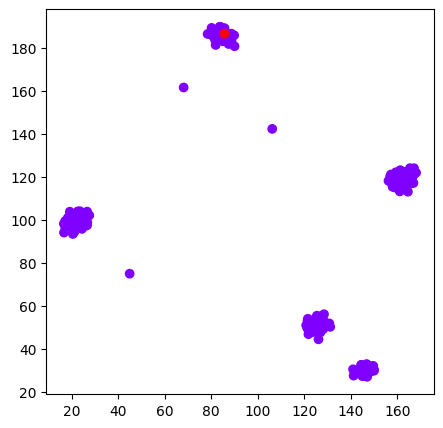

In [43]:
df['DBSCAN_labels'] = dbscan.labels_
plt.figure(figsize = (5,5))
plt.scatter(df['0'], df['1'], c = df['DBSCAN_labels'], cmap = 'rainbow')
plt.show()

In [44]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(df[['0', '1']])
distances, indices = nbrs.kneighbors(df[['0', '1']])

In [45]:
print(distances, indices)

[[0.00000000e+00 2.40828170e+01]
 [0.00000000e+00 2.90310835e+01]
 [0.00000000e+00 4.17173061e+01]
 [0.00000000e+00 7.09697424e-01]
 [0.00000000e+00 2.01729835e-01]
 [0.00000000e+00 1.32723802e+00]
 [0.00000000e+00 8.15888094e-01]
 [0.00000000e+00 6.76989579e-01]
 [0.00000000e+00 1.23380518e-01]
 [0.00000000e+00 3.87011595e-01]
 [0.00000000e+00 1.61410274e-01]
 [0.00000000e+00 2.03469519e-01]
 [0.00000000e+00 9.26765824e-01]
 [0.00000000e+00 1.70034088e+00]
 [0.00000000e+00 1.01897528e+00]
 [0.00000000e+00 4.14691747e-01]
 [0.00000000e+00 6.71719391e-01]
 [0.00000000e+00 5.15461565e-01]
 [0.00000000e+00 6.86011044e-01]
 [0.00000000e+00 4.14691747e-01]
 [0.00000000e+00 8.63354116e-01]
 [0.00000000e+00 1.82938705e-01]
 [0.00000000e+00 9.90772999e-01]
 [0.00000000e+00 5.14871110e-01]
 [0.00000000e+00 2.03469519e-01]
 [0.00000000e+00 2.30228806e+00]
 [0.00000000e+00 1.13050715e+00]
 [0.00000000e+00 1.40511060e+00]
 [0.00000000e+00 2.34880859e+00]
 [0.00000000e+00 1.13050715e+00]
 [0.000000

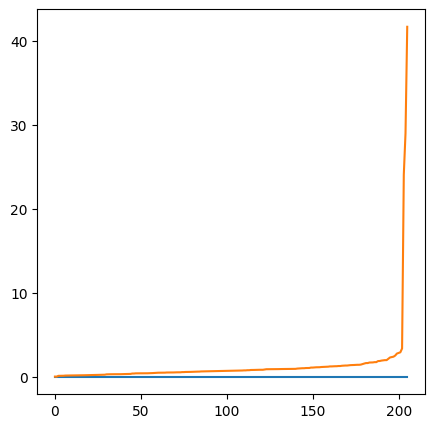

In [46]:
distances = np.sort(distances, axis = 0)
plt.figure(figsize = (5,5))
plt.plot(distances)
plt.show()

In [47]:
from sklearn.cluster import DBSCAN
dbscan_opt = DBSCAN(eps = 4, min_samples = 6)
dbscan_opt.fit(df[['0', '1']])

DBSCAN(eps=4, min_samples=6)

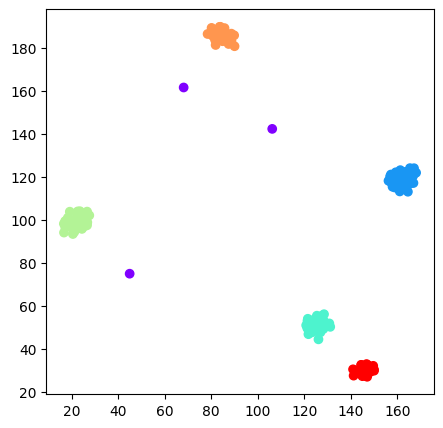

In [48]:
df['DBSCAN_opt_labels'] = dbscan_opt.labels_
plt.figure(figsize = (5,5))
plt.scatter(df['0'], df['1'], c = df['DBSCAN_opt_labels'], cmap = 'rainbow')
plt.show()